# Hurto a personas (del 01 de enero al 31 de diciembre año 2018). 
# Fuente: Dijin-Policía Nacional. Datos extraídos el día 06 de enero del año 2019 a las 08:00 horas.
![title](hurto.jpeg)

## Importar las librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cargar Datos para crear un DataFrame.

In [3]:
df1 = pd.read_csv('Hurto_a_personas_2018_parte_1.csv') #carga los datos del csv a través de la librería Pandas
df2 = pd.read_csv('Hurto_a_personas_2018_parte_2.csv')


In [4]:
data = pd.concat([df1,df2]) #unimos los dos datasets

## Ver las primeras filas de mi DataFrame

In [5]:
data.head() #head(), muestra los 5 primeros registros

,Fecha,Departamento,Municipio,Día,Hora,Barrio,Zona,Clase de sitio,Arma empleada,Móvil Agresor,Móvil Victima,Edad,Sexo,Estado civil,País de nacimiento,Clase de empleado,Profesión,Escolaridad,Código DANE,Cantidad
0,01/01/2018 12:00:00 AM,AMAZONAS,LETICIA (CT),Lunes,12/31/1899 01:30:00 AM,CASTAÑAL,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,SIN EMPLEO DE ARMAS,A PIE,A PIE,64,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,-,SECUNDARIA,9.1001e+07,1
1,01/01/2018 12:00:00 AM,ANTIOQUIA,APARTADÓ,Lunes,12/31/1899 10:00:00 AM,CENTRO,URBANA,CAJERO AUTOMATICO,SIN EMPLEO DE ARMAS,A PIE,A PIE,67,MASCULINO,SOLTERO,COLOMBIA,EMPLEADO PARTICULAR,-,PRIMARIA,5.045e+06,1
2,01/01/2018 12:00:00 AM,ANTIOQUIA,APARTADÓ,Lunes,12/31/1899 07:00:00 AM,MANZANAREZ,URBANA,CASAS DE HABITACION,SIN EMPLEO DE ARMAS,A PIE,A PIE,47,MASCULINO,UNION LIBRE,COLOMBIA,EMPLEADO PARTICULAR,-,PRIMARIA,5.045e+06,1
3,01/01/2018 12:00:00 AM,ANTIOQUIA,BELLO,Lunes,12/31/1899 05:00:00 PM,NIQUIA CAMACOL,URBANA,ESTACION DEL METRO,SIN EMPLEO DE ARMAS,PASAJERO METRO,PASAJERO METRO,18,MASCULINO,SOLTERO,COLOMBIA,DESEMPLEADO,-,SECUNDARIA,5.088e+06,1
4,01/01/2018 12:00:00 AM,ANTIOQUIA,BELLO,Lunes,12/31/1899 06:00:00 AM,PANAMERICANO,URBANA,FRENTE CENTRO COMERCIAL,ARMA DE FUEGO,A PIE,A PIE,35,FEMENINO,UNION LIBRE,COLOMBIA,EMPLEADO PARTICULAR,-,SECUNDARIA,5.088e+06,1


## Contar la cantidad de registros.

In [6]:
data['Fecha'].count()

249332

## Objetivo
#### Analizar los hurtos en colombia ocurridos dentro el periodo 1 de enero al 31 de diciembre del año 2018 mediante técnicas de data science para facilitar la interpretación de los datos.

## Preguntas a resolver 
&#x1F914;
#### ¿Cual es la cantidad de hurtos que se registra por el arma empleada?
#### ¿Cuáles son las regiones con más hurto?
#### ¿Cuál es el mes con más hurto?
#### ¿Cuál es el flujo de hurtos en el tiempo?
#### ¿Cuál es el intervalo de tiempo donde se cometen más hurtos en el día?

## 1. Cantidad de hurtos que se  registra por el arma empleada.

In [7]:
data['Arma empleada'].value_counts(dropna=False)

SIN EMPLEO DE ARMAS            115613
ARMA BLANCA / CORTOPUNZANTE     54479
ARMA DE FUEGO                   45738
CONTUNDENTES                    15993
NO REPORTADO                    15621
ESCOPOLAMINA                     1720
-                                  72
LLAVE MAESTRA                      69
PALANCAS                           11
PERRO                              11
SUSTANCIAS TOXICAS                  2
NaN                                 2
JERINGA                             1
Name: Arma empleada, dtype: int64

## 2.regiones con más hurto

In [8]:
data.groupby(['Arma empleada'])['Departamento'].value_counts().sort_values(ascending=False).head()

Arma empleada                Departamento
SIN EMPLEO DE ARMAS          CUNDINAMARCA    60909
ARMA BLANCA / CORTOPUNZANTE  CUNDINAMARCA    28073
SIN EMPLEO DE ARMAS          ANTIOQUIA       13212
ARMA DE FUEGO                CUNDINAMARCA    10786
NO REPORTADO                 CUNDINAMARCA     9238
Name: Departamento, dtype: int64

## 3. El mes con más hurtos

In [9]:
data['Mes'] = data['Fecha'].apply(lambda row: row.split('/')[0])

In [10]:
grupoMes = pd.DataFrame({'count' : data.groupby( ['Mes']).size()}).reset_index()
conteoHurtoMes = grupoMes['count'].max()
grupoMes[grupoMes['count'] == conteoHurtoMes]

,Mes,count
7,08,23065


In [11]:
hurtosPorMes = data.groupby(['Mes']).size()

In [12]:
hurtosPorMes

Mes
01       18794
02       18997
03       19775
04       22301
05       21789
06       20414
07       20733
08       23065
09       21491
10       22596
11       21171
12       18204
TOTAL        2
dtype: int64

## 4. flujo del hurto en el tiempo

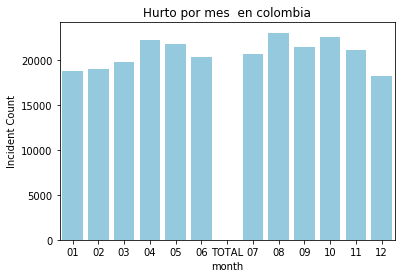

In [15]:
sns.countplot(data['Mes'], color='skyblue')
plt.title("Hurto por mes  en colombia")
plt.xlabel("month")
plt.ylabel("Incident Count")
plt.show()

### 5.intervalo de tiempo donde se cometen más hurtos en el día

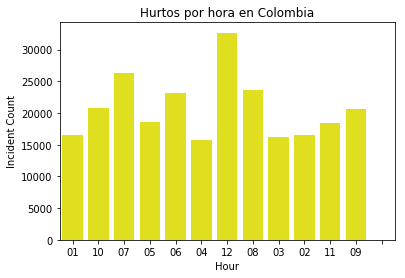

In [16]:
data['hora'] = (data['Hora'].fillna("")
                .apply(lambda row: row.split(':')[0])
                .apply(lambda row: row.split(' ')[-1]) 
                )

sns.countplot(data['hora'], color='yellow')
plt.title("Hurtos por hora en Colombia")
plt.xlabel("Hour")
plt.ylabel("Incident Count")
plt.show()